In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

In [14]:
to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence']
data = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1 )

In [2]:
data = pd.read_csv("../../src/data/processed_data.csv")

In [14]:
data.describe()

,transcript_id,transcript_position,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,...,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,gene_id,label,seq_left,seq_center,seq_right
count,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,...,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000
mean,369208.590382,1615.868407,0.008108,4.342127,110.789403,0.008127,5.157547,110.946258,0.007057,2.974051,...,1.828684,3.194697,0.004001,1.260798,2.448322,137722.042204,0.044937,10.809214,7.933633,11.645849
std,112392.110208,1395.137528,0.001787,1.936267,11.289521,0.001693,2.184069,12.460242,0.001296,0.894199,...,0.942802,1.000186,0.001170,0.716917,0.727562,49549.015079,0.207166,7.346083,5.333536,7.009534
min,233.000000,3.000000,0.003616,1.361306,80.370000,0.003803,1.441381,87.071498,0.003537,1.350225,...,0.227231,0.601585,0.000900,0.175260,0.520369,3.000000,0.000000,0.000000,0.000000,0.000000
25%,290158.000000,673.000000,0.006799,2.853595,104.596000,0.006904,3.221361,98.816048,0.006151,2.282982,...,0.956595,2.428203,0.003194,0.688769,1.939124,107937.000000,0.000000,4.000000,3.000000,5.000000
50%,358888.000000,1256.000000,0.007760,3.835318,110.122035,0.007834,4.669024,114.536673,0.006822,2.814199,...,1.851367,3.094400,0.003829,1.137486,2.356568,136636.000000,0.000000,11.000000,8.000000,12.000000
75%,414849.000000,2139.000000,0.009101,5.420603,119.299837,0.009066,6.963261,121.552632,0.007714,3.494345,...,2.533590,3.858959,0.004612,1.682102,2.854246,167969.000000,0.000000,17.000000,12.000000,17.000000
max,641834.000000,18730.000000,0.019119,11.644615,136.285714,0.021581,12.128800,137.120000,0.016344,11.898750,...,30.349842,9.739463,0.015972,30.331393,19.727495,284707.000000,1.000000,23.000000,17.000000,23.000000


In [9]:
data.columns

Index(['transcript_id', 'transcript_position', 'avg_1-flank_length',
       'avg_1-flank_std', 'avg_1-flank_mean', 'avg_central_length',
       'avg_central_std', 'avg_central_mean', 'avg_1+flank_length',
       'avg_1+flank_std', 'avg_1+flank_mean', 'med_1-flank_length',
       'med_1-flank_std', 'med_1-flank_mean', 'med_central_length',
       'med_central_std', 'med_central_mean', 'med_1+flank_length',
       'med_1+flank_std', 'med_1+flank_mean', 'std_1-flank_length',
       'std_1-flank_std', 'std_1-flank_mean', 'std_central_length',
       'std_central_std', 'std_central_mean', 'std_1+flank_length',
       'std_1+flank_std', 'std_1+flank_mean', 'gene_id', 'seq_left',
       'seq_center', 'seq_right'],
      dtype='object')

**Correlation-Based Feature Selection** 

In [10]:
correlation_matrix = data.corr()

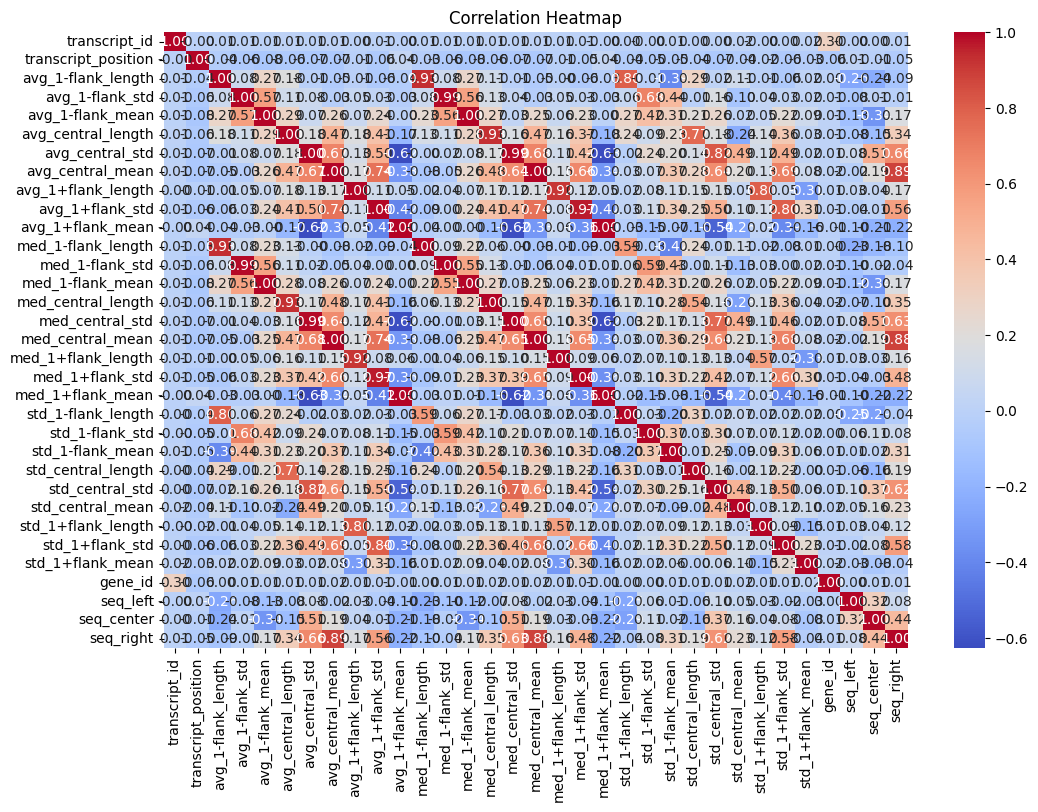

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**L1 regularization (Lasso)**

In [12]:
# lasso_model = LassoCV(cv=5)  # 5-fold cross-validation
# lasso_model.fit(X, y)
# feature_importance = np.abs(lasso_model.coef_)

# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importance Using Lasso Model')
# plt.gca().invert_yaxis()  
# plt.show()


NameError: name 'X' is not defined

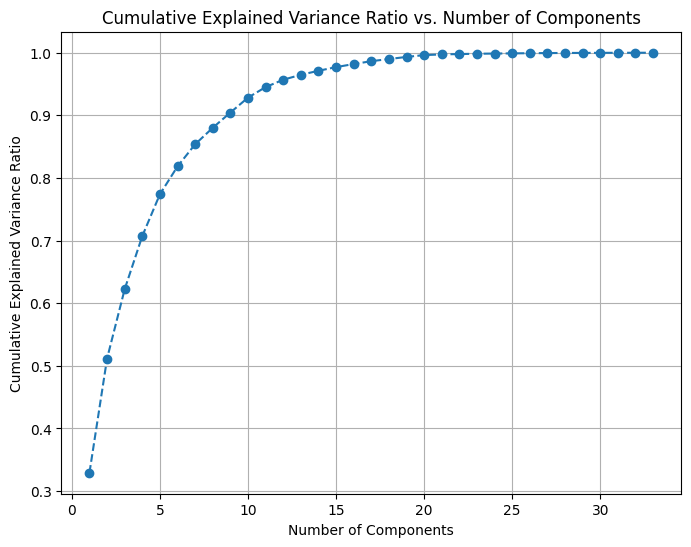

Number of components to retain 0.9 of variance: 9


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt
# to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence']
# data = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1 )
target = data['label'] 
X = data.drop(columns=['label'])

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.grid()
plt.show()

desired_variance_retained = 0.90  
n_components = len(cumulative_variance_ratio[cumulative_variance_ratio < desired_variance_retained]) + 1

print(f"Number of components to retain {desired_variance_retained} of variance: {n_components}")


**Recursive Feature Elimination (RFE)**

In [8]:
X = data.drop('label', axis=1)
y = data['label']
clf = LogisticRegression()

rfe = RFE(clf, n_features_to_select=9)

rfe.fit(X, y)
selected_features = [f for f, s in zip(X.columns, rfe.support_) if s]

c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [12]:
selected_features 

['avg_1-flank_mean',
 'avg_central_std',
 'avg_1+flank_std',
 'med_1-flank_mean',
 'med_central_std',
 'std_central_std',
 'std_central_mean',
 'std_1+flank_mean',
 'seq_right']

**Lasso**

In [10]:

target = data['label'] 
X = data.drop(columns=['label'])

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

lasso_model = LassoCV(cv=5)

lasso_model.fit(X_scaled, target)

feature_importance = lasso_model.coef_

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3971399177298736, tolerance: 0.4273178301015689
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8549097225468358, tolerance: 0.4273178301015689
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.297428608229893, tolerance: 0.4273178301015689
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\joeyl\miniconda3\envs\DSA4266\lib\site

In [11]:
feature_importance_df.head(15)

,Feature,Importance
7,avg_central_mean,0.844018
4,avg_1-flank_mean,0.810024
28,std_1+flank_mean,0.549553
21,std_1-flank_std,0.428793
24,std_central_std,0.408645
32,seq_right,0.318270
10,avg_1+flank_mean,0.293225
25,std_central_mean,0.274568
12,med_1-flank_std,0.197087
8,avg_1+flank_length,0.114692
